In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Concatenate the individual files in a dataset

In [2]:
weight_68 = 90
weight_69 = 70.3
weight_70 = 51
weight_71 = 55
weight_72 = 81
weight_73 = 70

weight_75 = 56
weight_76 = 80
weight_77 = 81
weight_78 = 70
weight_79 = 84

weight_80 = 74
weight_81 = 62
weight_82 = 73

In [3]:
user_ids = [68, 69, 70, 71, 72, 73, 75, 76, 77, 78, 79, 80, 81, 82]  # List of user IDs
weights = {  # Dictionary mapping user IDs to their corresponding weights
    68: weight_68, 69: weight_69, 70: weight_70, 71: weight_71, 72: weight_72,
    73: weight_73, 75: weight_75, 76: weight_76, 77: weight_77, 78: weight_78, 
    79: weight_79, 80: weight_80, 81: weight_81, 82: weight_82
}

dfs = []  # List to store dataframes

for user in user_ids:
    df = pd.read_csv(f"data/AB{user}_ml_dataset_extracted.csv", index_col=0)
    df["user"] = str(user)
    for i in range(1, 5):  # Normalizing NetPower columns
        df[f"NetPower_{i}"] = df[f" JointVelocities_{i}"]*df[f" InteractionForces_{i+1}"]
        df[f"NetPower_{i}_norm"] = df[f"NetPower_{i}"] / weights[user]
    dfs.append(df)  # Append to list

del df
# Optionally, concatenate all dataframes into one
final_df = pd.concat(dfs, ignore_index=True)

In [4]:
final_df["user"].value_counts()

user
71    828293
70    794239
81    791803
76    778056
69    725061
80    706054
79    644763
77    637923
82    624563
72    609276
73    549131
78    536495
75    532995
68    468857
Name: count, dtype: int64

In [5]:
final_df

,time,JointPositions_1,JointPositions_2,JointPositions_3,JointPositions_4,JointVelocities_1,JointVelocities_2,JointVelocities_3,JointVelocities_4,JointTorques_1,...,gait_cycle_right,user,NetPower_1,NetPower_1_norm,NetPower_2,NetPower_2_norm,NetPower_3,NetPower_3_norm,NetPower_4,NetPower_4_norm
0,466.553531,0.078189,-0.235500,0.113727,-0.247365,-0.155828,0.106088,-0.052824,0.007823,0.00000,...,0,68,-0.562869,-0.006254,1.893267,0.021036,0.270628,0.003007,0.049121,0.000546
1,466.555878,0.077920,-0.235313,0.113646,-0.247353,-0.154851,0.107677,-0.048463,0.007071,0.00000,...,0,68,-0.560526,-0.006228,1.907539,0.021195,0.263879,0.002932,0.044417,0.000494
2,466.556702,0.077920,-0.235313,0.113646,-0.247353,-0.154851,0.107677,-0.048463,0.007071,0.00000,...,0,68,-0.560494,-0.006228,1.907506,0.021195,0.263869,0.002932,0.044419,0.000494
3,466.557663,0.077632,-0.235094,0.113558,-0.247340,-0.153399,0.109747,-0.045425,0.006462,0.00000,...,0,68,-0.606215,-0.006736,1.958951,0.021766,0.217495,0.002417,0.040610,0.000451
4,466.558113,0.077632,-0.235094,0.113558,-0.247340,-0.153399,0.109747,-0.045425,0.006462,0.00000,...,0,68,-0.606201,-0.006736,1.958937,0.021766,0.217492,0.002417,0.040611,0.000451
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9227504,1146.619086,1.159508,-1.630665,1.187808,-1.642831,-0.159604,0.000967,-0.291180,0.007656,0.00000,...,99,82,3.869813,0.053011,0.007907,0.000108,9.833356,0.134704,0.048454,0.000664
9227505,1146.623792,1.158957,-1.630665,1.186825,-1.642800,-0.160884,0.000887,-0.293998,0.007746,0.00000,...,99,82,3.949650,0.054105,0.007116,0.000097,9.844219,0.134852,0.049082,0.000672
9227506,1146.625424,1.158644,-1.630665,1.186155,-1.642781,-0.161407,0.000364,-0.293571,0.008995,-0.15631,...,99,82,3.911375,0.053580,0.002973,0.000041,9.818932,0.134506,0.057121,0.000782
9227507,1146.628157,1.157986,-1.630665,1.184985,-1.642756,-0.163174,-0.000000,-0.291886,0.006780,0.00000,...,99,82,3.957155,0.054208,-0.000000,-0.000000,9.754807,0.133627,0.043119,0.000591


**todo** take other file format

# Net Power

In [6]:
# Rename the columns
df_power = final_df[~final_df['condition'].str.contains('UNDEFINED')].copy()
df_power.rename(columns={'NetPower_1_norm': 'Left Hip', 'NetPower_2_norm': 'Left Knee', 'NetPower_3_norm': 'Right Hip', 'NetPower_4_norm': 'Right Knee'}, inplace=True)

C:\Users\clhost\AppData\Local\Temp\ipykernel_21020\2774548372.py:50: UserWarning: The palette list has more values (12) than needed (10), which may not be intended.
  sns.boxplot(data=melted_df, x='Joint', y='Average_Power', hue='condition', palette=custom_palette, hue_order=new_order)


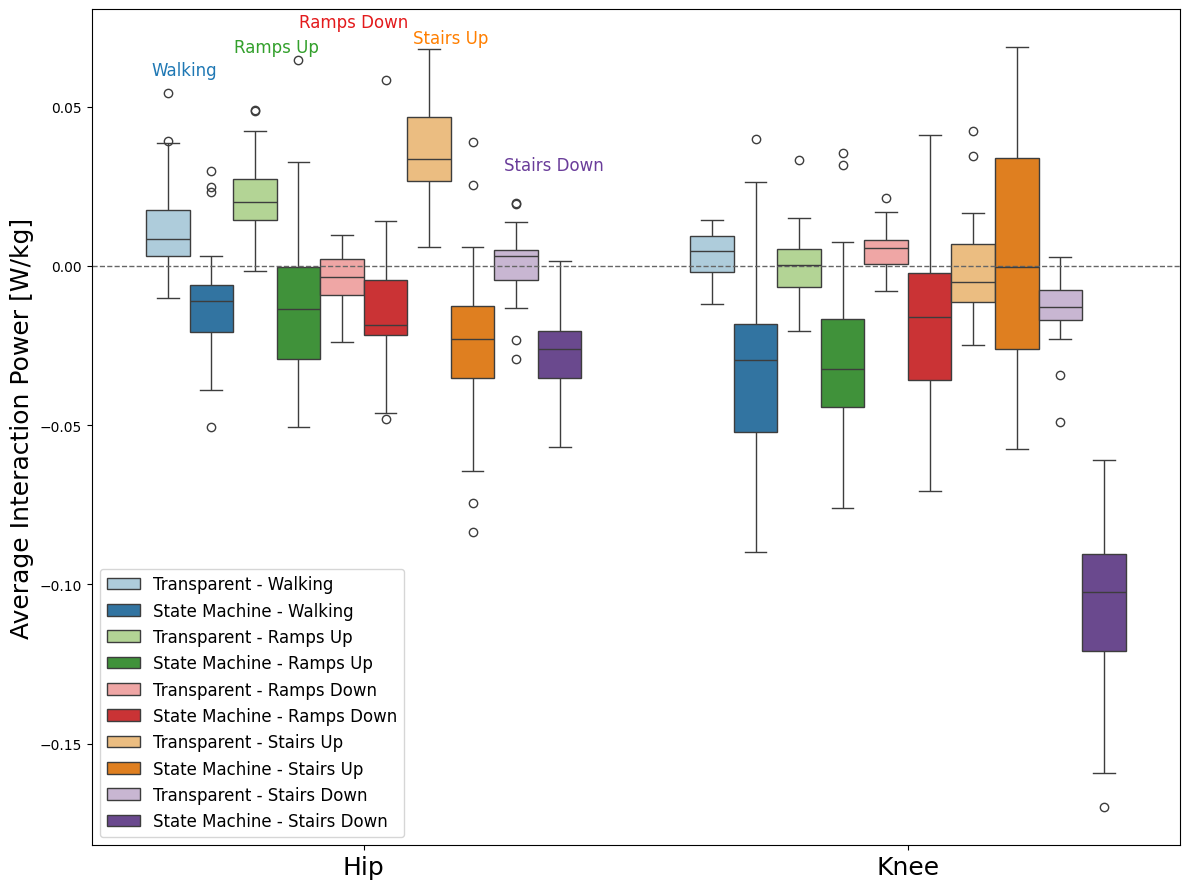

In [7]:
# Filter the DataFrame to include only complete steps
complete_steps_df = df_power[df_power['step_complete_r']]

# Group by step_number_r and calculate the average power for each step
average_power_df = complete_steps_df.groupby(['user', 'condition'])[['Left Hip', 'Left Knee', 'Right Hip', 'Right Knee']].mean().reset_index()

# Melt the DataFrame to make it suitable for plotting with Seaborn
melted_df = average_power_df.melt(id_vars=['user', 'condition'], value_vars=['Left Hip', 'Left Knee', 'Right Hip', 'Right Knee'], var_name='Joint', value_name='Average_Power')

melted_df['condition'] = melted_df['condition'].replace({
    'transparent_WALKING': 'Transparent - Walking',
    'SM_WALKING': 'State Machine - Walking',
    'SM_STAIRS_UP': 'State Machine - Stairs Up',
    'SM_STAIRS_DOWN': 'State Machine - Stairs Down',
    'SM_RAMPS_UP': 'State Machine - Ramps Up',
    'SM_RAMPS_DOWN': 'State Machine - Ramps Down',
    'transparent_RAMPS_UP': 'Transparent - Ramps Up',
    'transparent_RAMPS_DOWN': 'Transparent - Ramps Down',
    'transparent_STAIRS_UP': 'Transparent - Stairs Up',
    'transparent_STAIRS_DOWN': 'Transparent - Stairs Down'
})

new_order = ['Transparent - Walking',
             'State Machine - Walking',
             'Transparent - Ramps Up',
             'State Machine - Ramps Up',
             'Transparent - Ramps Down',
             'State Machine - Ramps Down',
             'Transparent - Stairs Up',
             'State Machine - Stairs Up',
             'Transparent - Stairs Down',
             'State Machine - Stairs Down']


# Add a column to indicate the leg
melted_df['Leg'] = melted_df['Joint'].str.split().str[0]

# Combine left and right legs
melted_df['Joint'] = melted_df['Joint'].str.split().str[1]

#Define Palette
light_palette = sns.color_palette("pastel", 5)
dark_palette = sns.color_palette("dark", 5)

# Combine light and dark shades to create pairs
custom_palette = sns.color_palette("Paired")#[color for pair in zip(light_palette, dark_palette) for color in pair]

# Create the boxplot
plt.figure(figsize=(12, 9))
sns.boxplot(data=melted_df, x='Joint', y='Average_Power', hue='condition', palette=custom_palette, hue_order=new_order)
plt.axhline(y=0, color="0.4", linestyle="--", linewidth=1)
plt.xlabel('', fontsize=13)
plt.ylabel('Average Interaction Power [W/kg]', fontsize=18)
plt.legend(fontsize=12)
plt.xticks(fontsize=18)  # Increase font size of x-axis labels

plt.text(-0.33, 0.06, 'Walking', color=custom_palette[1], fontsize=12, ha='center')
plt.text(-0.16, 0.067, 'Ramps Up', color=custom_palette[3], fontsize=12, ha='center')
plt.text(-0.018, 0.075, 'Ramps Down', color=custom_palette[5], fontsize=12, ha='center')
plt.text(0.16, 0.07, 'Stairs Up', color=custom_palette[7], fontsize=12, ha='center')
plt.text(0.35, 0.03, 'Stairs Down', color=custom_palette[9], fontsize=12, ha='center')


plt.tight_layout()

plt.show()

# Speed Difference

In [8]:
step_number = 0
previous_gait_cycle_r = None

# Function to assign step number
def assign_step(gait_cycle_r):
    global step_number
    global previous_gait_cycle_r

    if previous_gait_cycle_r is None or gait_cycle_r < previous_gait_cycle_r:
        step_number += 1

    previous_gait_cycle_r = gait_cycle_r

    return step_number

# Reset step number
step_number = 0

# Add step number to the DataFrame for right steps
final_df['step_number_r'] = final_df.apply(lambda row: assign_step(row['gait_cycle_right']), axis=1)

In [9]:
final_df["StrideLength"] = 0.0

l = [0.4,0.4]
#l = [0.37,0.35]
for step in final_df.step_number_r.unique():
    th0 = final_df.loc[final_df.step_number_r==step,' BackPackAngle']

    # to do : consider only coordinates when foot is in swing ?
    th1 = final_df.loc[(final_df.step_number_r==step),' JointPositions_3']
    th2 = final_df.loc[(final_df.step_number_r==step),' JointPositions_4']

    xAnkle = -l[0] * np.cos(th0 + th1) - l[1] * np.cos(th0 + th1 + th2)
    yAnkle = -l[0] * np.sin(th0 + th1) - l[1] * np.sin(th0 + th1 + th2)

    #stepLength = np.max(xAnkle) - np.min(xAnkle)
    final_df.loc[final_df.step_number_r==step, 'StrideLength'] = (np.max(xAnkle) - np.min(xAnkle)).astype(float)

for step in final_df.step_number_r.unique():

  final_df.loc[final_df.step_number_r==step,"StrideTime"] = final_df[final_df.step_number_r==step].time.iloc[-1]-final_df[final_df.step_number_r==step].time.iloc[0]

final_df["StrideSpeed"] = final_df.StrideLength / final_df.StrideTime

In [10]:
final_df.step_number_r

0             1
1             1
2             1
3             1
4             1
           ... 
9227504    3573
9227505    3573
9227506    3573
9227507    3573
9227508    3573
Name: step_number_r, Length: 9227509, dtype: int64

In [11]:
# Filter the DataFrame for conditions containing "SM" and get the first row of each group
filtered_df = final_df[(final_df.step_complete_r)&~(final_df.condition.str.contains("UNDEFINED"))].groupby("step_number_r")[["StrideSpeed","condition","user"]].first()

filtered_df_avg = filtered_df.groupby(["user","condition"]).StrideSpeed.mean().to_frame().reset_index()

filtered_df_avg["controller"] = filtered_df_avg["condition"].str.split("_").str[0]
filtered_df_avg["activity"] = filtered_df_avg["condition"].apply(lambda x: '_'.join(x.split('_')[1:]))

filtered_df_avg


,user,condition,StrideSpeed,controller,activity
0,68,SM_RAMPS_DOWN,0.164945,SM,RAMPS_DOWN
1,68,SM_RAMPS_UP,0.206748,SM,RAMPS_UP
2,68,SM_STAIRS_DOWN,0.094798,SM,STAIRS_DOWN
3,68,SM_STAIRS_UP,0.117162,SM,STAIRS_UP
4,68,SM_WALKING,0.221947,SM,WALKING
...,...,...,...,...,...
134,82,transparent_RAMPS_DOWN,0.218883,transparent,RAMPS_DOWN
135,82,transparent_RAMPS_UP,0.185679,transparent,RAMPS_UP
136,82,transparent_STAIRS_DOWN,0.148049,transparent,STAIRS_DOWN
137,82,transparent_STAIRS_UP,0.155272,transparent,STAIRS_UP


In [12]:
grouped_data = filtered_df_avg.groupby(['activity', 'controller'])['StrideSpeed'].mean()
new_df = filtered_df_avg[filtered_df_avg.controller == "SM"]
new_df[new_df.controller == "SM"].shape


(69, 5)

In [13]:
new_df.user.value_counts()


user
68    5
69    5
70    5
71    5
72    5
73    5
75    5
76    5
77    5
78    5
79    5
81    5
82    5
80    4
Name: count, dtype: int64

In [14]:

new_df[new_df.user=="80"].activity

filtered_df_avg[filtered_df_avg.controller == "transparent"].shape

filtered_df_avg_remove_row = filtered_df_avg[~((filtered_df_avg.user == "80")&(filtered_df_avg.activity == "STAIRS_DOWN"))]

filtered_df_avg_remove_row.shape

new_df["PercentageDifference"] = (filtered_df_avg_remove_row[filtered_df_avg_remove_row.controller == "SM"].StrideSpeed.values - filtered_df_avg_remove_row[filtered_df_avg_remove_row.controller == "transparent"].StrideSpeed.values) * 100 / filtered_df_avg_remove_row[filtered_df_avg_remove_row.controller == "transparent"].StrideSpeed.values

new_df.head()

C:\Users\clhost\AppData\Local\Temp\ipykernel_21020\2673593550.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["PercentageDifference"] = (filtered_df_avg_remove_row[filtered_df_avg_remove_row.controller == "SM"].StrideSpeed.values - filtered_df_avg_remove_row[filtered_df_avg_remove_row.controller == "transparent"].StrideSpeed.values) * 100 / filtered_df_avg_remove_row[filtered_df_avg_remove_row.controller == "transparent"].StrideSpeed.values


,user,condition,StrideSpeed,controller,activity,PercentageDifference
0,68,SM_RAMPS_DOWN,0.164945,SM,RAMPS_DOWN,2.128832
1,68,SM_RAMPS_UP,0.206748,SM,RAMPS_UP,9.055198
2,68,SM_STAIRS_DOWN,0.094798,SM,STAIRS_DOWN,0.873140
3,68,SM_STAIRS_UP,0.117162,SM,STAIRS_UP,0.244836
4,68,SM_WALKING,0.221947,SM,WALKING,4.657696


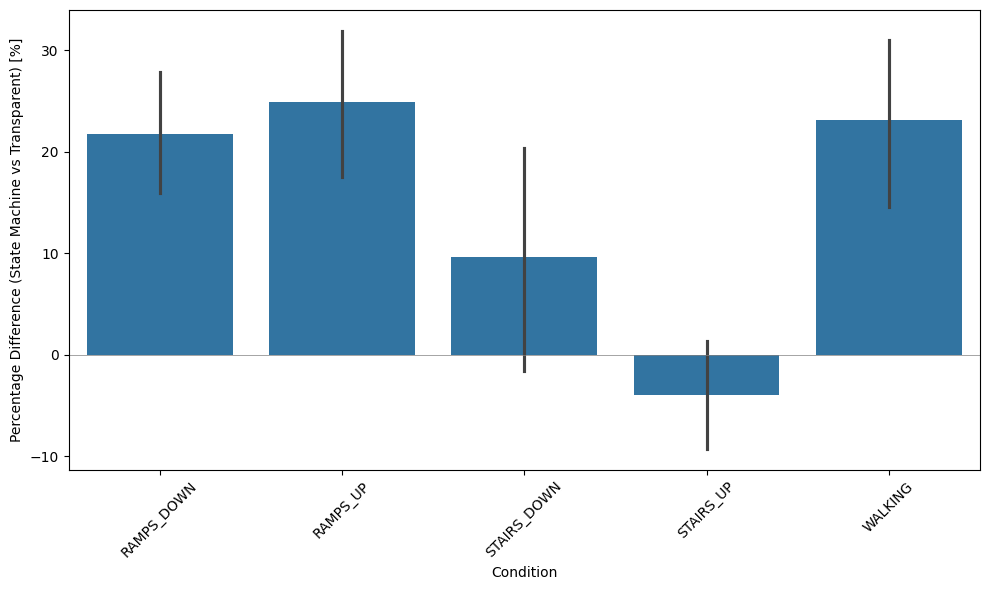

In [15]:

plt.figure(figsize=(10, 6))

# Plotting the percentage difference grouped by condition
sns.barplot(x="activity", y="PercentageDifference", data=new_df)

# Adding a horizontal line at y=0 for reference
plt.axhline(0, color='grey', linewidth=0.5)

# Adding labels and title
plt.xlabel("Condition")
plt.ylabel("Percentage Difference (State Machine vs Transparent) [%]")

# Rotating x-axis labels for better readability if needed
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()

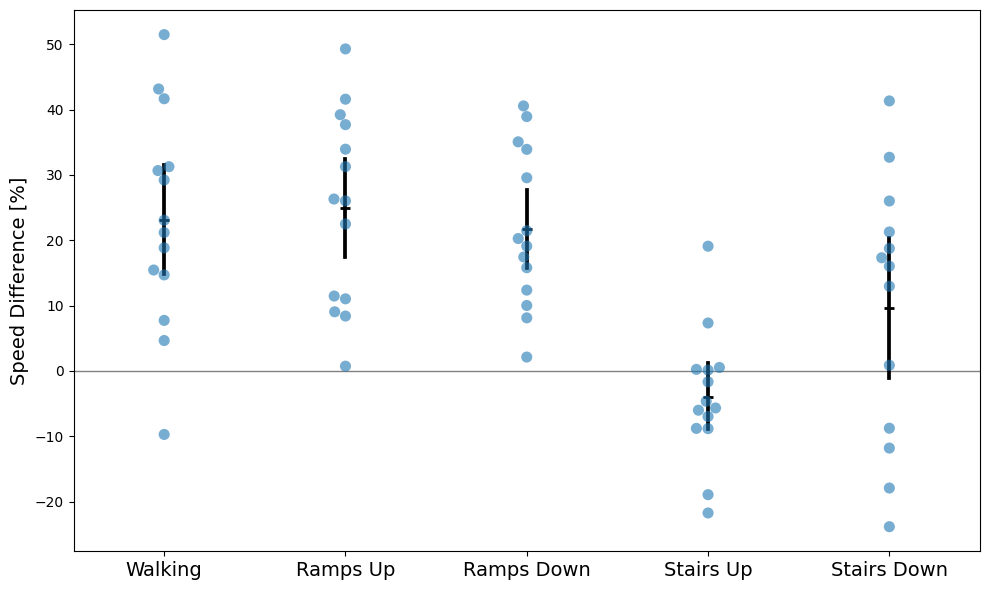

In [16]:
plt.figure(figsize=(10, 6))

order_speed = ["WALKING","RAMPS_UP","RAMPS_DOWN","STAIRS_UP","STAIRS_DOWN"]

# Adding a horizontal line at y=0 for reference
plt.axhline(0, color='grey', linewidth=1)

# Plotting individual user data points
sns.swarmplot(x="activity", y="PercentageDifference", color=sns.color_palette()[0], order=order_speed,
              size=8, edgecolor='none', data=new_df, alpha=0.6)  # Adjust alpha for transparency

              # Plotting the percentage difference grouped by condition with bars
p = sns.pointplot(x="activity", y="PercentageDifference", data=new_df, order = order_speed,
               color="black", linestyle="none", marker="_", estimator='mean', errorbar=('ci', 95)) #capsize=.1,

# Adding labels and title
plt.xlabel("", fontsize=2)
plt.ylabel("Speed Difference [%]",fontsize=14)

plt.xticks([0,1,2,3,4],["Walking","Ramps Up","Ramps Down","Stairs Up","Stairs Down"],fontsize=14)
# Rotating x-axis labels for better readability if needed
#plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()

# Trajectories Difference

In [17]:
df_camargo = pd.read_csv("data/all_user_selected_activities_compare_SM.csv",index_col=0)
df_camargo["HeelStrike_gcLeft_INT"] =  df_camargo.HeelStrike_gcLeft.astype(int)

FileNotFoundError: [Errno 2] No such file or directory: 'data/all_user_selected_activities_compare_SM.csv'

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure and axes with 5 rows and 2 columns
fig, axes = plt.subplots(5, 2, figsize=(12, 20))

# Plot for walking
sns.lineplot(ax=axes[0, 0], data=df_camargo[df_camargo.Label_cond == "walk"], x="HeelStrike_gcLeft_INT", y="hip_flexion_l_ik", label="Benchmark", errorbar="sd")
sns.lineplot(ax=axes[0, 0], data=df[df.step_complete_l & (df.condition == "SM_WALKING")], x="gait_cycle_left", y=np.rad2deg(df[df.step_complete_r & (df.condition == "SM_WALKING")][" JointPositions_1"]), label="State-Machine", errorbar="sd")
sns.lineplot(ax=axes[0, 0], data=df[df.step_complete_l & (df.condition == "transparent_WALKING")], x="gait_cycle_left", y=np.rad2deg(df[df.step_complete_r & (df.condition == "transparent_WALKING")][" JointPositions_1"]), label="Transparent", errorbar="sd")

sns.lineplot(ax=axes[0, 1], data=df_camargo[df_camargo.Label_cond == "walk"], x="HeelStrike_gcLeft_INT", y="knee_angle_l_ik", label="Benchmark", errorbar="sd")
sns.lineplot(ax=axes[0, 1], data=df[df.step_complete_l & (df.condition == "SM_WALKING")], x="gait_cycle_left", y=np.rad2deg(df[df.step_complete_r & (df.condition == "SM_WALKING")][" JointPositions_2"]), label="State-Machine", errorbar="sd")
sns.lineplot(ax=axes[0, 1], data=df[df.step_complete_l & (df.condition == "transparent_WALKING")], x="gait_cycle_left", y=np.rad2deg(df[df.step_complete_r & (df.condition == "transparent_WALKING")][" JointPositions_2"]), label="Transparent", errorbar="sd")


# Plot for ramp ascent
sns.lineplot(ax=axes[1, 0], data=df_camargo[df_camargo.Label_cond == "rampascent"], x="HeelStrike_gcLeft_INT", y="hip_flexion_l_ik", label="Benchmark", errorbar="sd")
sns.lineplot(ax=axes[1, 0], data=df[df.step_complete_l & (df.condition == "SM_RAMPS_UP")], x="gait_cycle_left", y=np.rad2deg(df[df.step_complete_r & (df.condition == "SM_RAMPS_UP")][" JointPositions_1"]), label="State-Machine", errorbar="sd")
sns.lineplot(ax=axes[1, 0], data=df[df.step_complete_l & (df.condition == "transparent_RAMPS_UP")], x="gait_cycle_left", y=np.rad2deg(df[df.step_complete_r & (df.condition == "transparent_RAMPS_UP")][" JointPositions_1"]), label="Transparent", errorbar="sd")

sns.lineplot(ax=axes[1, 1], data=df_camargo[df_camargo.Label_cond == "rampascent"], x="HeelStrike_gcLeft_INT", y="knee_angle_l_ik", label="Benchmark", errorbar="sd")
sns.lineplot(ax=axes[1, 1], data=df[df.step_complete_l & (df.condition == "SM_RAMPS_UP")], x="gait_cycle_left", y=np.rad2deg(df[df.step_complete_r & (df.condition == "SM_RAMPS_UP")][" JointPositions_2"]), label="State-Machine", errorbar="sd")
sns.lineplot(ax=axes[1, 1], data=df[df.step_complete_l & (df.condition == "transparent_RAMPS_UP")], x="gait_cycle_left", y=np.rad2deg(df[df.step_complete_r & (df.condition == "transparent_RAMPS_UP")][" JointPositions_2"]), label="Transparent", errorbar="sd")


# Plot for ramp descent
sns.lineplot(ax=axes[2, 0], data=df_camargo[df_camargo.Label_cond == "rampdescent"], x="HeelStrike_gcLeft_INT", y="hip_flexion_l_ik", label="Benchmark", errorbar="sd")
sns.lineplot(ax=axes[2, 0], data=df[df.step_complete_l & (df.condition == "SM_RAMPS_DOWN")], x="gait_cycle_left", y=np.rad2deg(df[df.step_complete_r & (df.condition == "SM_RAMPS_DOWN")][" JointPositions_1"]), label="State-Machine", errorbar="sd")
sns.lineplot(ax=axes[2, 0], data=df[df.step_complete_l & (df.condition == "transparent_RAMPS_DOWN")], x="gait_cycle_left", y=np.rad2deg(df[df.step_complete_r & (df.condition == "transparent_RAMPS_DOWN")][" JointPositions_1"]), label="Transparent", errorbar="sd")

sns.lineplot(ax=axes[2, 1], data=df_camargo[df_camargo.Label_cond == "rampdescent"], x="HeelStrike_gcLeft_INT", y="knee_angle_l_ik", label="Benchmark", errorbar="sd")
sns.lineplot(ax=axes[2, 1], data=df[df.step_complete_l & (df.condition == "SM_RAMPS_DOWN")], x="gait_cycle_left", y=np.rad2deg(df[df.step_complete_r & (df.condition == "SM_RAMPS_DOWN")][" JointPositions_2"]), label="State-Machine", errorbar="sd")
sns.lineplot(ax=axes[2, 1], data=df[df.step_complete_l & (df.condition == "transparent_RAMPS_DOWN")], x="gait_cycle_left", y=np.rad2deg(df[df.step_complete_r & (df.condition == "transparent_RAMPS_DOWN")][" JointPositions_2"]), label="Transparent", errorbar="sd")



# Plot for Stair ascent
sns.lineplot(ax=axes[3, 0], data=df_camargo[df_camargo.Label_cond == "stairascent"], x="HeelStrike_gcLeft_INT", y="hip_flexion_l_ik", label="Benchmark", errorbar="sd")
sns.lineplot(ax=axes[3, 0], data=df[df.step_complete_l & (df.condition == "SM_STAIRS_UP")], x="gait_cycle_left", y=np.rad2deg(df[df.step_complete_r & (df.condition == "SM_STAIRS_UP")][" JointPositions_1"]), label="State-Machine", errorbar="sd")
sns.lineplot(ax=axes[3, 0], data=df[df.step_complete_l & (df.condition == "transparent_STAIRS_UP")], x="gait_cycle_left", y=np.rad2deg(df[df.step_complete_r & (df.condition == "transparent_STAIRS_UP")][" JointPositions_1"]), label="Transparent", errorbar="sd")

sns.lineplot(ax=axes[3, 1], data=df_camargo[df_camargo.Label_cond == "stairascent"], x="HeelStrike_gcLeft_INT", y="knee_angle_l_ik", label="Benchmark", errorbar="sd")
sns.lineplot(ax=axes[3, 1], data=df[df.step_complete_l & (df.condition == "SM_STAIRS_UP")], x="gait_cycle_left", y=np.rad2deg(df[df.step_complete_r & (df.condition == "SM_STAIRS_UP")][" JointPositions_2"]), label="State-Machine", errorbar="sd")
sns.lineplot(ax=axes[3, 1], data=df[df.step_complete_l & (df.condition == "transparent_STAIRS_UP")], x="gait_cycle_left", y=np.rad2deg(df[df.step_complete_r & (df.condition == "transparent_STAIRS_UP")][" JointPositions_2"]), label="Transparent", errorbar="sd")


# Plot for Stair descent
sns.lineplot(ax=axes[4, 0], data=df_camargo[df_camargo.Label_cond == "stairdescent"], x="HeelStrike_gcLeft_INT", y="hip_flexion_l_ik", label="Benchmark", errorbar="sd")
sns.lineplot(ax=axes[4, 0], data=df[df.step_complete_l & (df.condition == "SM_STAIRS_DOWN")], x="gait_cycle_left", y=np.rad2deg(df[df.step_complete_r & (df.condition == "SM_STAIRS_DOWN")][" JointPositions_1"]), label="State-Machine", errorbar="sd")
sns.lineplot(ax=axes[4, 0], data=df[df.step_complete_l & (df.condition == "transparent_STAIRS_DOWN")], x="gait_cycle_left", y=np.rad2deg(df[df.step_complete_r & (df.condition == "transparent_STAIRS_DOWN")][" JointPositions_1"]), label="Transparent", errorbar="sd")

sns.lineplot(ax=axes[4, 1], data=df_camargo[df_camargo.Label_cond == "stairdescent"], x="HeelStrike_gcLeft_INT", y="knee_angle_l_ik", label="Benchmark", errorbar="sd")
sns.lineplot(ax=axes[4, 1], data=df[df.step_complete_l & (df.condition == "SM_STAIRS_DOWN")], x="gait_cycle_left", y=np.rad2deg(df[df.step_complete_r & (df.condition == "SM_STAIRS_DOWN")][" JointPositions_2"]), label="State-Machine", errorbar="sd")
sns.lineplot(ax=axes[4, 1], data=df[df.step_complete_l & (df.condition == "transparent_STAIRS_DOWN")], x="gait_cycle_left", y=np.rad2deg(df[df.step_complete_r & (df.condition == "transparent_STAIRS_DOWN")][" JointPositions_2"]), label="Transparent", errorbar="sd")


ymin_hip = -25  # Set your desired minimum y-value
ymax_hip = 75   # Set your desired maximum y-value
ymin_knee = -105
ymax_knee = -5

# Add labels and titles
for i in range(5):
    axes[i, 0].set_ylabel("Hip Angle [deg]",fontsize=14)
    axes[i, 1].set_ylabel("Knee Angle [deg]",fontsize=14)
    axes[i, 0].set_xlabel("Gait Cycle [%]",fontsize=14)
    axes[i, 1].set_xlabel("Gait Cycle [%]",fontsize=14)
    axes[i, 0].set_ylim(ymin_hip, ymax_hip)
    axes[i, 1].set_ylim(ymin_knee, ymax_knee)


# Set titles for each row
axes[0, 0].set_title("Walking",fontsize=16, pad = 20, x=1)
axes[1, 0].set_title("Ramp Ascent", fontsize=16, pad=20, x=1)
axes[2, 0].set_title("Ramp Descent", fontsize=16, pad=20, x=1)
axes[3, 0].set_title("Stair Ascent", fontsize=16,pad=20, x=1)
axes[4, 0].set_title("Stair Descent", fontsize=16,pad=20, x=1)


plt.tight_layout()
plt.savefig("/content/gdrive/MyDrive/X2_STATE_MACHINE/V2/Figures/"+"Camargo_Comparison_"+str(len(df.user.unique()))+"_users_v2.1_SD.svg",format="svg")

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Define the R^2 values for each joint and activity
r2_values = {
    'Activity': ['Walking', 'Ramp Ascent', 'Ramp Descent', 'Stair Ascent', 'Stair Descent'],
    'Camargo vs. State Machine (Hip Flexion)': [r2_hip_flexion_sm, r2_hip_flexion_ramp_ascent_sm, r2_hip_flexion_ramp_descent_sm, r2_hip_flexion_stair_ascent_sm, r2_hip_flexion_stair_descent_sm],
    'Camargo vs. Transparent (Hip Flexion)': [r2_hip_flexion_transparent, r2_hip_flexion_ramp_ascent_transparent, r2_hip_flexion_ramp_descent_transparent, r2_hip_flexion_stair_ascent_transparent, r2_hip_flexion_stair_descent_transparent],
    'Camargo vs. State Machine (Knee Angle)': [r2_knee_angle_sm, r2_knee_angle_ramp_ascent_sm, r2_knee_angle_ramp_descent_sm, r2_knee_angle_stair_ascent_sm, r2_knee_angle_stair_descent_sm],
    'Camargo vs. Transparent (Knee Angle)': [r2_knee_angle_transparent, r2_knee_angle_ramp_ascent_transparent, r2_knee_angle_ramp_descent_transparent, r2_knee_angle_stair_ascent_transparent, r2_knee_angle_stair_descent_transparent]
}

# Create a DataFrame from the dictionary
df_r2 = pd.DataFrame(r2_values)

# Set the 'Activity' column as index
df_r2.set_index('Activity', inplace=True)

# Plot the heatmap
plt.figure(figsize=(12, 6))

# Plot left part (Hip Flexion)
plt.subplot(1, 2, 1)
sns.heatmap(df_r2[['Camargo vs. State Machine (Hip Flexion)', 'Camargo vs. Transparent (Hip Flexion)']], annot=True, cmap='coolwarm', fmt=".2f")
plt.xticks([0.5,1.5],['State Machine', 'Transparent'], rotation=0)
plt.title('Hip Flexion')

# Plot right part (Knee Angle)
plt.subplot(1, 2, 2)
sns.heatmap(df_r2[['Camargo vs. State Machine (Knee Angle)', 'Camargo vs. Transparent (Knee Angle)']], annot=True, cmap='coolwarm', fmt=".2f")
plt.xticks([0.5,1.5],['State Machine', 'Transparent'], rotation=0)
plt.title('Knee Angle')

plt.suptitle('R^2 Coefficients for Joints and Activities, compared to benchmark Dataset', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
